# **Capital Bikeshare Demand Prediction**

by: Muhammad Sultan Pasya

![alt text](capital-bikeshare-logo.png)

## **Context**
Capital Bikeshare (CaBi) serves Washington, D.C., and parts of its metropolitan area, with over 700 stations and 5,400 bikes as of January 2023. These automated bike rentals enhance urban mobility, reduce environmental impact, and promote health. Since launching in 2010, CaBi has generated rich data on user behavior and traffic patterns, offering insights valuable for urban planning and transportation.

Capital Bikeshare faces challenges in efficiently managing its 700+ stations and 5,400 bikes across Washington, D.C. and surrounding areas. The unpredictable nature of bike demand, influenced by factors such as weather, time of day, and seasonal variations, makes it difficult to ensure optimal bike availability and station capacity. Without accurate demand predictions, the system risks either overstocking or understocking bikes at various locations, leading to inefficient operations and a suboptimal user experience.

## **Problem Statement**
So, the big question is: **How to predict bike demand to improve station operations and balance bike availability throughout the day?**

## **Goals**
To solve this, we aim to build a model that predicts bike rental demand based on key factors like weather, temperature, and time. These predictions will help optimize station operations, balance bike availability, and enhance service efficiency, enabling stakeholders to make informed, data-driven decisions.

## **Analytic Approach**
This project will employ **regression modelling** to predict bike rental demand. The approach will follow these steps:

1. **Data Understanding and Cleaning:** Explore the dataset to identify missing values, duplicates, or incorrect data types. Clean the data by handling missing values, correcting data types, and removing duplicates to ensure the dataset is ready for analysis.
2. **Defining X (Features) and y (Target):** Select the target variable (`y`) and the features (`X`) that will be used for prediction. Proper feature selection helps improve model performance.
3. **Splitting the Data:** Split the dataset into two parts: training (to train the model) and testing (to evaluate performance) with a ratio of 80/20.
4. **Data Preprocessing:** Apply necessary preprocessing such as scaling, encoding categorical variables, and handling outliers to prepare the features for model training.
5. **Cross-Validation:** Apply cross-validation to compare different models or parameter settings. This ensures that the best model is selected based on its performance across multiple folds of the data.
6. **Hypertuning Parameters:** Perform hyperparameter tuning using grid search or random search to optimize model performance based on cross-validation results.
7. **Evaluation:** Evaluate the model on the test data using regression metrics like RMSE, MAE, and MAPE to assess prediction accuracy.
8. **Conclusion:** Summarize the findings, model performance, and provide insights or recommendations based on the analysis.
9. **Recommendations:** Provide stakeholders with actionable recommendations, focusing on optimizing station operations, balancing bike availability, and improving overall service efficiency.

## **Metric Evaluation**
To evaluate the performance of the regression models, we will use the following metrics:
- **Root Mean Squared Error (RMSE):** This measures the square root of the average squared differences between predicted and actual values. It provides insight into the model's overall prediction error in the same unit as the target variable. Lower RMSE values indicate better performance.
- **Mean Absolute Error (MAE):** This calculates the average of the absolute differences between predicted and actual values. MAE is easy to interpret and gives an idea of the magnitude of errors. Like RMSE, a lower MAE value suggests more accurate predictions.
- **Mean Absolute Percentage Error (MAPE):** This metric expresses the prediction errors as a percentage of the actual values. It's useful when you want to understand the relative error in the model's predictions. A lower MAPE indicates better model performance, especially in cases where relative accuracy matters.

The chosen model will aim to minimize RMSE, MAE, and MAPE to ensure accurate and reliable predictions.

## **Load Dataset**

In [40]:
# importing necessary library for data cleaning and data visualization
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# other
import warnings
warnings.filterwarnings("ignore")

The dataset contains detailed records of bike rentals, including weather conditions, time of day, and more. Analyzing this data helps predict bike demand and provides actionable insights for optimizing resource allocation and service efficiency.

Here is the data dictionary:

| Feature    | Description                                                                                                                    |
|------------|--------------------------------------------------------------------------------------------------------------------------------|
| dteday     | Date                                                                                                                           |
| season     | Season (1: winter, 2: spring, 3: summer, 4: fall)                                                                               |
| hr         | Hour (0 to 23)                                                                                                                  |
| holiday    | Whether the day is a holiday (0: No, 1: Yes)                                                                                    |
| temp       | Normalized temperature in Celsius. Values derived via `(t-tmin)/(tmax-tmin)` where tmin=-8°C, tmax=+39°C (Hourly scale)          |
| atemp      | Normalized feeling temperature in Celsius. Values derived via `(t-tmin)/(tmax-tmin)` where tmin=-16°C, tmax=+50°C (Hourly scale) |
| hum        | Normalized humidity. Values divided by 100 (maximum)                                                                            |
| casual     | Count of casual users                                                                                                           |
| registered | Count of registered users                                                                                                       |
| cnt        | Count of total rental bikes including both casual and registered users                                                          |
| weathersit | Weather situation:                                                                                                              |
|            | 1: Clear, Few clouds, Partly cloudy                                                                                             |
|            | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds                                                                       |
|            | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds                                                                     |
|            | 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog                                                                   |


In [41]:
df = pd.read_csv("data_bike_sharing.csv")
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


## **Data Understanding and Data Cleaning**

In [42]:
df.shape

(12165, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Based on the initial analysis, the dataset consists of 12,165 rows and 11 columns. Out of these, 10 columns are numeric, and 1 column, `dteday`, is of the object type. Since `dteday` represents dates, it should be converted to the proper datetime format, which we will do next.

### **Data Type Conversion and Feature Extraction**

In [44]:
df["dteday"] = pd.to_datetime(df["dteday"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


In [45]:
df["dteday"].nunique()

731

Given that the `dteday` column contains 731 unique values, which is quite extensive, we'll simplify processing by splitting this column into separate `year`, `month`, and `day` columns. This will make it more manageable and useful for modeling purposes.

In [46]:
df["year"] = df["dteday"].dt.year
df["month"] = df["dteday"].dt.month.astype("category")
df["day"] = df["dteday"].dt.day_name().astype("category")

### **Deleting and Renaming Columns**

Since the `dteday` column has already been split, and the values in the `casual` and `registered` columns are already captured in `cnt` (the sum of both columns), we will delete them. Additionally, we'll rename some columns to make them easier to reference in the upcoming analysis.

In [47]:
# Deleting unncessary columns
df.drop(columns=["dteday", "casual", "registered"], inplace=True)
df.head()

,hum,weathersit,holiday,season,atemp,temp,hr,cnt,year,month,day
0,0.62,1,0,4,0.3485,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.5152,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.6212,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.3485,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.6970,0.76,18,857,2012,7,Tuesday


In [48]:
# Rename the columns to make it easier to understand
df = df.rename(columns={
    "hum": "humidity",
    "weathersit": "weather",
    "atemp": "feel_temp",
    "hr": "hour",
    "cnt": "count"
})
df.head()

,humidity,weather,holiday,season,feel_temp,temp,hour,count,year,month,day
0,0.62,1,0,4,0.3485,0.36,16,250,2011,12,Friday
1,0.64,1,0,2,0.5152,0.54,4,18,2012,6,Sunday
2,0.53,1,0,2,0.6212,0.62,23,107,2011,6,Wednesday
3,0.87,2,0,2,0.3485,0.36,8,145,2012,3,Saturday
4,0.55,1,0,3,0.6970,0.76,18,857,2012,7,Tuesday


### **Finding Anomalies and Duplicated Data**

In [49]:
df.describe()

,humidity,weather,holiday,season,feel_temp,temp,hour,count,year
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,189.271023,2011.501932
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,181.223903,0.500017
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000,2011.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,40.000000,2011.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,142.000000,2012.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,282.000000,2012.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,970.000000,2012.000000


There are rows with a humidity value of 0, which is unrealistic. Therefore, we'll drop these rows from the dataset. Additionally, we'll remove any duplicate records that are found.

In [50]:
df = df[df["humidity"] != 0]

In [51]:
df[df["humidity"] == 0]

,humidity,weather,holiday,season,feel_temp,temp,hour,count,year,month,day


In [52]:
df.duplicated().sum()

1

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.shape

(12150, 11)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12150 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   humidity   12150 non-null  float64 
 1   weather    12150 non-null  int64   
 2   holiday    12150 non-null  int64   
 3   season     12150 non-null  int64   
 4   feel_temp  12150 non-null  float64 
 5   temp       12150 non-null  float64 
 6   hour       12150 non-null  int64   
 7   count      12150 non-null  int64   
 8   year       12150 non-null  int32   
 9   month      12150 non-null  category
 10  day        12150 non-null  category
dtypes: category(2), float64(3), int32(1), int64(5)
memory usage: 926.1 KB


After deleting unnecessary columns, cleaning the anomalies, and dropping duplicated data, we have a total of 12150 rows and 11 columns, with 9 numeric columns and 2 categorical columns.

### **Checking Data Distribution and Outliers**

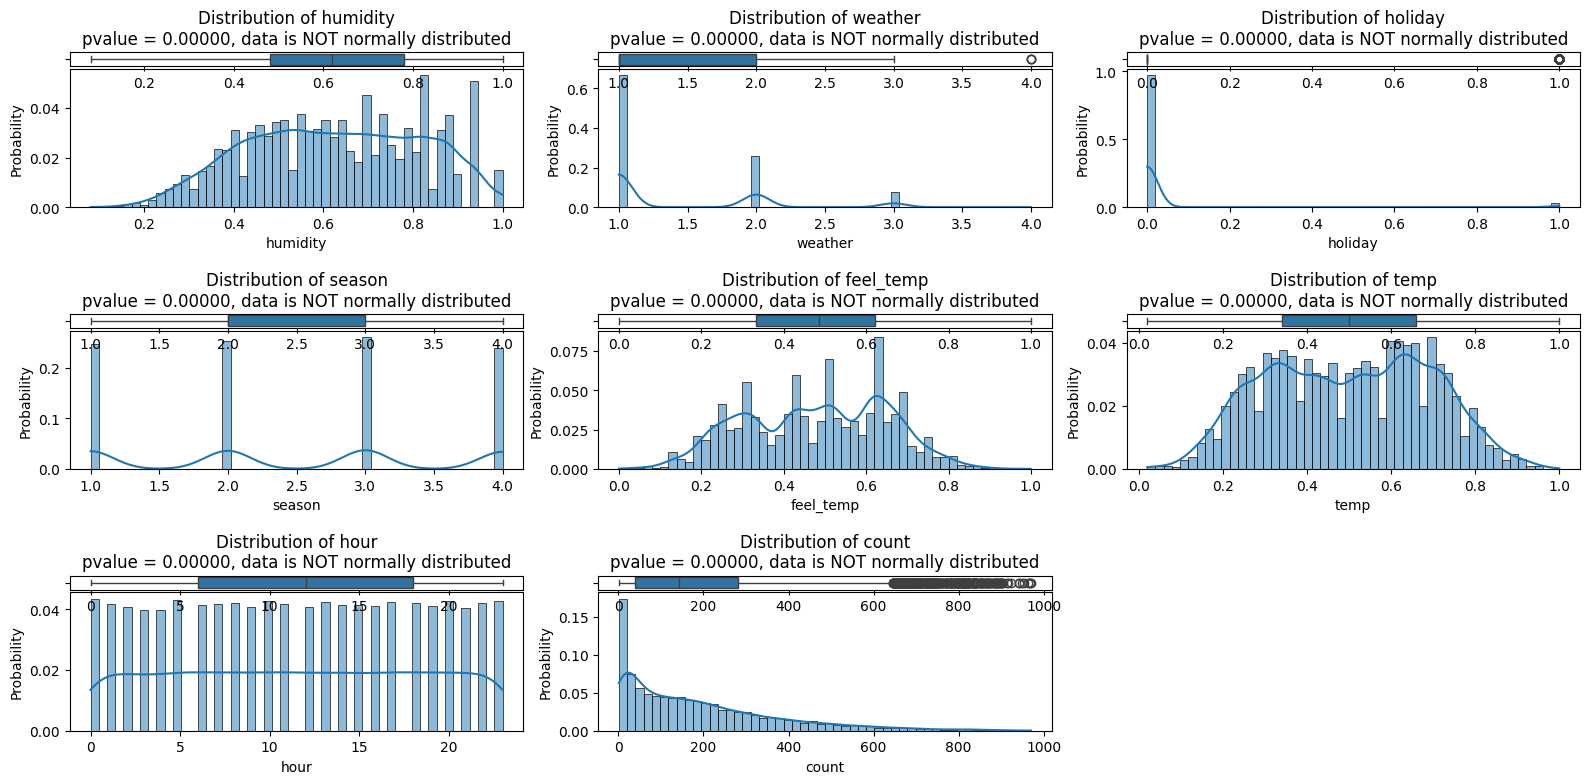

In [56]:
# Checking distribution and outliers
from scipy.stats import normaltest

numerical_features = df.select_dtypes(include=["number"])

fig, axes = plt.subplots(3, 3, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_features):
    stat, pvalue = normaltest(df[column].dropna())  # Normality test

    if pvalue > 0.05:
        distribution = f"pvalue = {pvalue:.5f}, data is normally distributed"
    else:
        distribution = f"pvalue = {pvalue:.5f}, data is NOT normally distributed"

    axes[i].set_title(f"Distribution of {column}\n{distribution}")
    
    sns.histplot(data=df[column], ax=axes[i], kde=True, bins=50, stat="probability")
    
    ax_box = axes[i].inset_axes([0, 1.02, 1, 0.1])
    sns.boxplot(x=df[column], ax=ax_box)
    ax_box.set(xlabel="")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

The graphs show that most variables, such as `humidity`, `weather`, and `temperature`, are not normally distributed. `holiday` and `season` exhibit highly imbalanced and categorical distributions, while the `feel_temp` and `temp` variables are slightly skewed, with some potential outliers. The `count` variable is heavily right-skewed, indicating most rentals are on the lower end, so we'll apply a transformation (e.g., log or square root) to normalize it for better model performance and reduced influence of extreme values.

### **Business Insights**

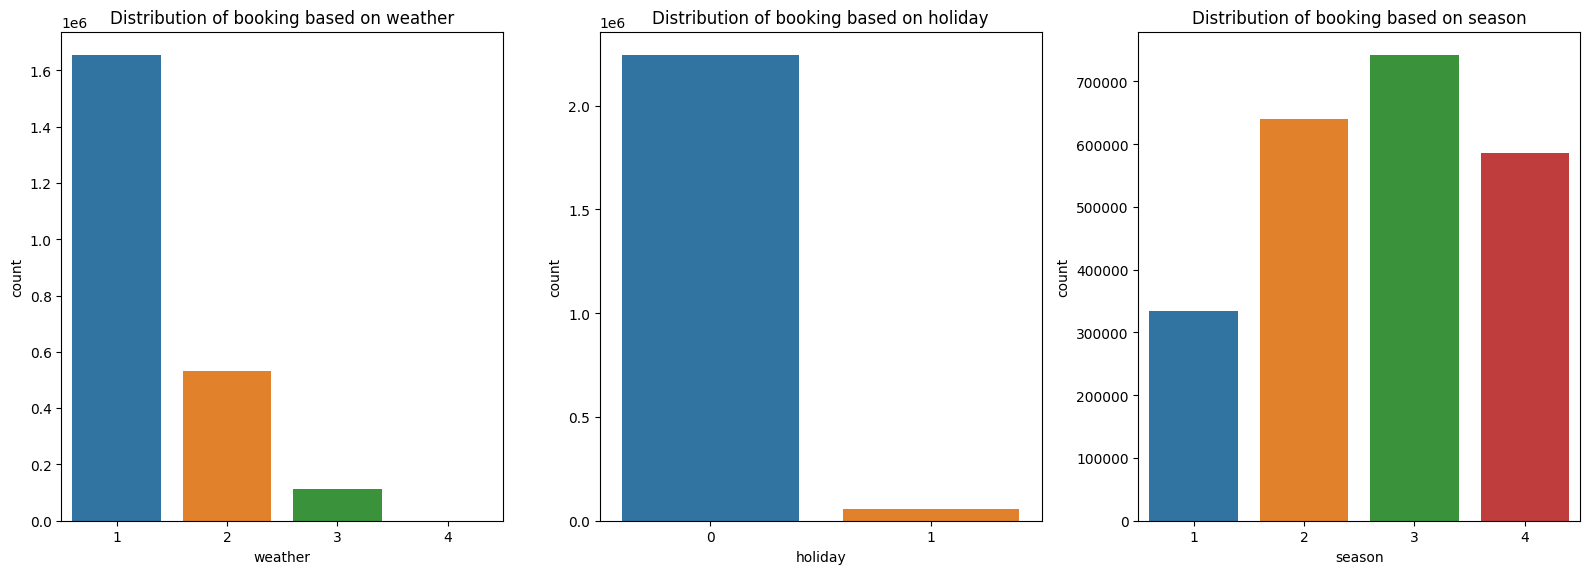

In [57]:
# Distibution of booking based on weather, holiday, and season
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
features = ["weather", "holiday", "season"]

for i, feature in enumerate(features):
    sns.barplot(data=df, x=feature, y="count", ax=axes[i], estimator=sum, ci=None, palette=sns.color_palette())
    axes[i].set_xlabel(feature)
    axes[i].set_title(f"Distribution of booking based on {feature}")

plt.tight_layout()
plt.show()

Based on the `weather` column, bikes are most frequently rented on clear (1) days. The `holiday` column shows that rentals are predominantly higher on weekdays. Meanwhile, the `season` column indicates that bookings are fairly evenly distributed across different seasons, with the highest number occurring in summer (3).

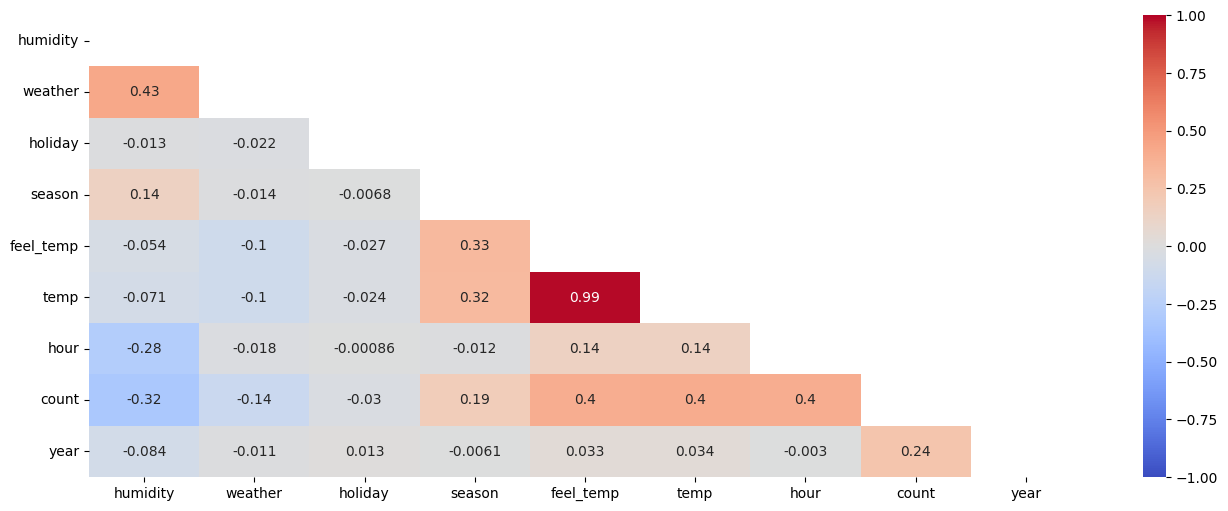

In [58]:
mask = np.triu(df.corr(numeric_only=True))
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm', mask=mask, vmax=1, center=0, vmin=-1)
plt.show()

The target column, `count`, does not exhibit a strong correlation with other features. The strongest correlations are observed with `feel_temp`, `temp`, and `hour`, all showing a positive correlation. This indicates that as the temperature rises and as it gets later in the day, the number of renters tends to increase.

### **Checking the Value Range of the Target**

In [92]:
df["count"].min()

1

In [93]:
df["count"].max()

970

The target variable, which represents the total number of bike rentals, has values ranging from 1 to 970. This range is important for interpreting the Root Mean Square Error (RMSE) metric.

## **Define X and y**

For this analysis, the **features** (`X`) will include all the columns in the dataset except for the `count` column, which will serve as our **target** (`y`). The target variable represents the value we aim to predict, while the features provide the necessary input data for making those predictions. By excluding `count` from the features, we ensure that the model is predicting based solely on the other variables. 

In [59]:
X = df.drop(columns="count")
y = df["count"]

display(X.head(), y.head())

,humidity,weather,holiday,season,feel_temp,temp,hour,year,month,day
0,0.62,1,0,4,0.3485,0.36,16,2011,12,Friday
1,0.64,1,0,2,0.5152,0.54,4,2012,6,Sunday
2,0.53,1,0,2,0.6212,0.62,23,2011,6,Wednesday
3,0.87,2,0,2,0.3485,0.36,8,2012,3,Saturday
4,0.55,1,0,3,0.6970,0.76,18,2012,7,Tuesday


0    250
1     18
2    107
3    145
4    857
Name: count, dtype: int64

## **Data Splitting**

Next, we'll split the data for both `X` (features) and `y` (target) into training and testing sets using an 80:20 ratio. We set `random_state = 0` to ensure reproducibility of the results. The split data will be stored in the following variables:

- `X_train` for the training features
- `X_test` for the testing features
- `y_train` for the training target
- `y_test` for the testing target

This split allows us to train the model on 80% of the data and test its performance on the remaining 20%.

In [60]:
# import the library
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

## **Data Preprocessing**

To begin data preprocessing, we will first analyze the dataset by examining the **number of unique values**, identifying any **missing values**, and checking the **data types** of each feature. This analysis helps us understand the structure of the data, determine if any features need encoding or imputation, and decide on appropriate preprocessing techniques for each variable.

In [62]:
pd.DataFrame(
    {
        "Features": X.columns.values,
        "# of Unique": [X[col].nunique() for col in X.columns.values],
        "Types": X.dtypes.values,
        "Values": [X[col].values for col in X.columns.values]
    }
)

,Features,# of Unique,Types,Values
0,humidity,88,float64,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.9..."
1,weather,4,int64,"[1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, ..."
2,holiday,2,int64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,season,4,int64,"[4, 2, 2, 2, 3, 4, 3, 1, 4, 2, 3, 1, 1, 1, 2, ..."
4,feel_temp,65,float64,"[0.3485, 0.5152, 0.6212, 0.3485, 0.697, 0.4545..."
5,temp,50,float64,"[0.36, 0.54, 0.62, 0.36, 0.76, 0.46, 0.7, 0.26..."
6,hour,24,int64,"[16, 4, 23, 8, 18, 0, 22, 9, 4, 16, 5, 18, 7, ..."
7,year,2,int32,"[2011, 2012, 2011, 2012, 2012, 2012, 2012, 201..."
8,month,12,category,"[12, 6, 6, 3, 7, ..., 1, 7, 2, 3, 4] Length: 1..."
9,day,7,category,"['Friday', 'Sunday', 'Wednesday', 'Saturday', ..."


Based on the analysis, we will perform the following preprocessing tasks:

#### **Binning**
We will apply **ordinal binning** with 5 uniform bins to the following continuous features:
- `humidity`
- `feel_temp`
- `temp`

#### **Encoding**
For categorical variables, we will use **OneHotEncoder** to transform:
- `month`
- `day`

#### **Scaling**
We will use RobustScaler to scale the following features to ensure they are within a specific range:
- `weather`
- `season`
- `hour`
- `year`
- `month`
- `day`

In [63]:
# import necessary library

# binning
from sklearn.preprocessing import KBinsDiscretizer

# encoding
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import RobustScaler

# column transformer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

In [64]:
onehot_robust = Pipeline(
    [
        ("OneHot", OneHotEncoder()),
        ("Robust", RobustScaler(with_centering=False))
    ]
)

In [65]:
transformer = ColumnTransformer(
    [("Hum, Temp, Feel", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ["humidity", "temp", "feel_temp"]),
     ("OH_Rob", onehot_robust, ["day", "month"]),
     ("Robust", RobustScaler(), ["weather", "season", "hour", "year"])],
     remainder="passthrough"
)

transformer.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Hum, Temp, Feel',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['humidity', 'temp', 'feel_temp']),
                                ('OH_Rob',
                                 Pipeline(steps=[('OneHot', OneHotEncoder()),
                                                 ('Robust',
                                                  RobustScaler(with_centering=False))]),
                                 ['day', 'month']),
                                ('Robust', RobustScaler(),
                                 ['weather', 'season', 'hour', 'year'])])

## **Cross-Validation**

After all the data has been binned, encoded, and scaled, the next step is to perform cross-validation. First, we will import the necessary libraries to facilitate this process.

In [66]:
# import necessary library

# models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# errors
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate, KFold

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# transformed target regressor
from sklearn.compose import TransformedTargetRegressor

### **Model Comparison**

The models we will compare include:
- **Linear Regression**
- **K-Nearest Neighbours**
- **Decision Tree**
- **Random Forest**
- **Adaptive Boost**
- **Extreme Gradient Boost**

Since we are dealing with regression data, we will use the following scoring metrics:
- **RMSE**
- **MAE**
- **MAPE**

For cross-validation, we will implement **KFold** with the following parameters:
- `n_splits = 5`
- `shuffle = True`
- `random_state = 19`

This setup will help us evaluate the performance of each model effectively.

In [67]:
# define model
linear = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

log_linear = TransformedTargetRegressor(linear, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_forest = TransformedTargetRegressor(forest, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

scorer = [
    "neg_root_mean_squared_error", 
    "neg_mean_absolute_error", 
    "neg_mean_absolute_percentage_error"
    ]

models = {"Linear Regression": log_linear, "KNN": log_knn, "Decision Tree": log_tree, "Random Forest": log_forest, "ADA Boost": log_ada, "XGB": log_xgb}

list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = []

list_mean_mape = []
list_std_mape = []


for idx, model in enumerate(models):
    pipe_model =Pipeline([
                        ("preprocessl", transformer),
                        ("model", models[model])
                    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=19)

    cv_score = cross_validate(
        estimator = pipe_model, 
        X = X_train,
        y = y_train, 
        cv = cv,
        scoring = scorer,
        error_score="raise"
        )

    list_mean_rmse.append(cv_score["test_neg_root_mean_squared_error"].mean())
    list_std_rmse.append(cv_score["test_neg_root_mean_squared_error"].std())

    list_mean_mae.append(cv_score["test_neg_mean_absolute_error"].mean())
    list_std_mae.append(cv_score["test_neg_mean_absolute_error"].std())

    list_mean_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].mean())
    list_std_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].std())

In [68]:
pd.DataFrame(
    {
        "Mean RMSE": list_mean_rmse,
        "STD RMSE": list_std_rmse,
        "Mean MAE": list_mean_mae,
        "STD Mae": list_std_mae,
        "Mean MAPE": list_mean_mape,
        "STD MAPE": list_std_mape
    },
    index=models.keys()
).sort_values("Mean RMSE", ascending=False)

,Mean RMSE,STD RMSE,Mean MAE,STD Mae,Mean MAPE,STD MAPE
XGB,-45.329082,2.938431,-27.506795,1.207153,-0.256465,0.007049
Random Forest,-50.540100,3.445591,-30.193541,1.093237,-0.294278,0.007704
Decision Tree,-65.311067,3.570057,-38.515474,1.148234,-0.389983,0.015113
KNN,-139.074309,3.566504,-88.256607,1.697032,-1.448803,0.070099
ADA Boost,-147.600433,3.049535,-88.698085,1.889025,-0.530100,0.012964
Linear Regression,-165.869010,1.669989,-109.368733,1.416509,-1.430169,0.036368


### **Predict to Test Data (Before Tuning)**

Based on the cross-validation results, we found that **Extreme Gradient Boost (XGB)** exhibited the least error by a significant margin. We will now use this model to make predictions on the test data to evaluate its fit and performance.

In [69]:
# Benchmark 3 model terbaik
best_models = {"XGB": log_xgb}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in best_models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', best_models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(rmse(y_test, y_pred))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [70]:
score_before_tuning = pd.DataFrame(
    {
        "RMSE": score_rmse,
        "MAE": score_mae,
        "MAPE": score_mape
    },
    index=best_models.keys()
)

score_before_tuning

,RMSE,MAE,MAPE
XGB,41.644678,25.299804,0.243471


## **Extreme Gradient Boost**

### **What is XGBoost?**

**XGBoost (Extreme Gradient Boosting)** is an optimized implementation of the gradient boosting algorithm designed for performance and speed. It builds an ensemble of decision trees sequentially, where each tree attempts to correct the errors of the previous ones by minimizing a differentiable loss function.

### **How Does XGBoost Work?**

Here’s a step-by-step example of how XGBoost works for a **regression problem**:

#### **Problem: Predict House Prices Based on Size**
Let's say we want to predict the price of houses based on their size.

| House | Size (sq. ft) | Actual Price ($) | Initial Prediction ($) | Residual |
|-------|---------------|------------------|------------------------|----------|
| A     | 1,000         | 300,000          | 250,000                | 50,000   |
| B     | 1,200         | 350,000          | 275,000                | 75,000   |
| C     | 1,500         | 400,000          | 300,000                | 100,000  |

1. **Initial Prediction:** XGBoost starts with an average guess for all house prices (e.g., predicting $250,000).

2. **Calculate Residuals:** Subtract the predicted price from the actual price to get the residuals (errors).

3. **First Tree:** A decision tree is built to predict the residuals.

| House | Size (sq. ft) | Residual ($)  | First Tree Prediction ($) |
|-------|---------------|---------------|--------------------------|
| A     | 1,000         | 50,000        | 40,000                   |
| B     | 1,200         | 75,000        | 60,000                   |
| C     | 1,500         | 100,000       | 80,000                   |

4. **Update Prediction:** The first tree’s prediction is added to the initial prediction.

| House | Initial Prediction ($) | First Tree Prediction ($) | Updated Prediction ($) |
|-------|------------------------|--------------------------|------------------------|
| A     | 250,000                | 40,000                   | 290,000                |
| B     | 275,000                | 60,000                   | 335,000                |
| C     | 300,000                | 80,000                   | 380,000                |

5. **Repeat the Process:** More trees are built to further reduce residuals. Each tree improves upon the previous model’s prediction.

| House | Updated Prediction ($) | Residual ($)  | Second Tree Prediction ($) |
|-------|------------------------|---------------|----------------------------|
| A     | 290,000                | 10,000        | 5,000                      |
| B     | 335,000                | 15,000        | 8,000                      |
| C     | 380,000                | 20,000        | 10,000                     |

6. **Final Prediction:** After multiple trees, the predictions converge to more accurate house prices.

| House | Final Prediction ($) | Actual Price ($) |
|-------|----------------------|------------------|
| A     | 295,000              | 300,000          |
| B     | 343,000              | 350,000          |
| C     | 390,000              | 400,000          |

#### **Summary:**
- XGBoost starts with an initial prediction (e.g., the average).
- It builds trees to correct errors (residuals).
- Each tree’s prediction is added to the previous ones to improve accuracy.
- The process repeats until the model converges, yielding more accurate results.

### **Applications**

XGBoost is widely used in a variety of applications, including:

- **Predictive Analytics**: Forecasting demand, financial modeling, and stock price prediction.
- **Classification Tasks**: Spam detection, image recognition, and medical diagnoses.
- **Ranking Systems**: Recommendation engines (e.g., movie recommendations), search ranking, and ad ranking.
- **Anomaly Detection**: Fraud detection, network security analysis, and outlier detection.
- **Natural Language Processing (NLP)**: Sentiment analysis and text classification.
- **Competitions**: Kaggle and other data science competitions, where its speed and accuracy are highly valued.

## **Hyperparameter Tuning**

Next, we will perform **hyperparameter tuning** to optimize the model's performance by finding the best combination of parameters. This process helps improve the model's accuracy and generalization.

The parameters we will tune for the **XGB** model include:
- `max_depth`: Controls the maximum depth of trees (prevents overfitting).
- `learning_rate`: Step size used to update weights (smaller values increase accuracy but require more trees).
- `n_estimators`: Number of trees in the model (more trees can improve accuracy but may lead to overfitting).
- `subsample`: Fraction of the data used to grow trees (reduces overfitting by adding randomness).
- `gamma`: Minimum loss reduction required for further tree splitting (higher values prevent unnecessary splits).   
- `colsample_bytree`: Fraction of features used for each tree (helps reduce overfitting).
- `reg_alpha`: L1 regularization term on weights (helps reduce overfitting by adding penalties).

These hyperparameters will be tuned to enhance the model's performance on the test data.

In [71]:
hyperparam = {
    "modeling__regressor__max_depth": list(np.arange(1, 11)), 
    "modeling__regressor__learning_rate": list(np.arange(0.1, 1, 0.1).round(2)),
    "modeling__regressor__n_estimators": list(np.arange(100, 501, 10)),
    "modeling__regressor__subsample": list(np.arange(1, 11)/10),
    "modeling__regressor__gamma": list(np.arange(0, 11)),
    "modeling__regressor__colsample_bytree": list(np.arange(1, 10)/10),
    "modeling__regressor__reg_alpha": list(np.logspace(-3, 3, 7))
}

pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", log_xgb)
    ]) 

random_xgb = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam,
    n_iter = 1000,
    cv = cv,
    scoring = scorer, 
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
)

random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=19, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Hum, '
                                                                               'Temp, '
                                                                               'Feel',
                                                                               KBinsDiscretizer(encode='ordinal',
                                                                                                strategy='uniform'),
                                                                               ['humidity',
                                                                                'temp',
                                                                                'feel_temp']),
                                                                              ('OH_Rob',
                                                                               Pipeline(steps=[('OneHot',
                                                                                                OneHotEncoder()),
                                                                                               ('Robust',
                                                                                                RobustScale...
                                                                              250,
                                                                              260,
                                                                              270,
                                                                              280,
                                                                              290,
                                                                              300,
                                                                              310,
                                                                              320,
                                                                              330,
                                                                              340,
                                                                              350,
                                                                              360,
                                                                              370,
                                                                              380,
                                                                              390, ...],
                                        'modeling__regressor__reg_alpha': [0.001,
                                                                           0.01,
                                                                           0.1,
                                                                           1.0,
                                                                           10.0,
                                                                           100.0,
                                                                           1000.0],
                                        'modeling__regressor__subsample': [0.1,
                                                                           0.2,
                                                                           0.3,
                                                                           0.4,
                                                                           0.5,
                                                                           0.6,
                                                                           0.7,
                                                                           0.8,
                     

In [72]:
random_xgb.best_params_

{'modeling__regressor__subsample': 1.0,
 'modeling__regressor__reg_alpha': 0.001,
 'modeling__regressor__n_estimators': 500,
 'modeling__regressor__max_depth': 6,
 'modeling__regressor__learning_rate': 0.1,
 'modeling__regressor__gamma': 0,
 'modeling__regressor__colsample_bytree': 0.7}

In [73]:
random_xgb.best_score_

-42.937003902642566

In [74]:
pd.set_option('display.max_columns', None) # To show all columns
pd.DataFrame(random_xgb.cv_results_).sort_values("rank_test_neg_root_mean_squared_error")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__regressor__subsample,param_modeling__regressor__reg_alpha,param_modeling__regressor__n_estimators,param_modeling__regressor__max_depth,param_modeling__regressor__learning_rate,param_modeling__regressor__gamma,param_modeling__regressor__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
783,0.733211,0.030912,0.044277,0.007655,1.0,0.001,500,6,0.1,0,0.7,"{'modeling__regressor__subsample': 1.0, 'model...",-42.591365,-47.276297,-41.690341,-41.770850,-41.356167,-42.937004,2.207354,1,-25.801098,-27.722576,-25.876782,-25.359760,-25.548430,-26.061729,0.850504,1,-0.251558,-0.249877,-0.243234,-0.235148,-0.243023,-0.244568,0.005830,1
996,0.441426,0.024383,0.023756,0.004471,0.4,0.010,140,8,0.1,0,0.8,"{'modeling__regressor__subsample': 0.4, 'model...",-44.571581,-51.663540,-44.901166,-43.716665,-44.225286,-45.815648,2.950146,2,-27.022765,-30.503256,-28.258312,-26.883336,-27.583408,-28.050215,1.318779,2,-0.267794,-0.269543,-0.253232,-0.248828,-0.256850,-0.259249,0.008118,2
672,0.600797,0.013955,0.047128,0.006360,1.0,1.000,340,10,0.3,0,0.4,"{'modeling__regressor__subsample': 1.0, 'model...",-47.611235,-50.898545,-46.286142,-44.076658,-44.360687,-46.646653,2.488754,3,-27.965360,-30.570314,-28.083665,-26.971591,-26.774449,-28.073076,1.352598,3,-0.272764,-0.265718,-0.258899,-0.253964,-0.256249,-0.261519,0.006867,3
621,0.479352,0.039578,0.020672,0.005589,0.8,0.100,100,9,0.4,0,0.7,"{'modeling__regressor__subsample': 0.8, 'model...",-45.947602,-53.326983,-46.624373,-46.520501,-46.489117,-47.781715,2.782620,4,-28.490477,-31.286602,-29.252931,-28.440143,-28.269884,-29.148007,1.121527,6,-0.286133,-0.279493,-0.263865,-0.269608,-0.275409,-0.274902,0.007711,8
469,0.598244,0.049410,0.034415,0.003478,0.9,0.010,240,8,0.3,0,0.3,"{'modeling__regressor__subsample': 0.9, 'model...",-49.082552,-51.241448,-47.068133,-46.283343,-45.727271,-47.880550,2.029194,5,-29.972245,-30.457536,-29.060353,-28.222116,-27.670716,-29.076593,1.040777,5,-0.284449,-0.269998,-0.263688,-0.267291,-0.259365,-0.268958,0.008528,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.381933,0.018349,0.012364,0.003434,0.1,1000.000,400,5,0.8,3,0.4,"{'modeling__regressor__subsample': 0.1, 'model...",-206.520244,-211.439678,-203.518073,-206.603939,-206.376006,-206.891588,2.551556,968,-143.042707,-148.095066,-140.660957,-143.172797,-144.681218,-143.930549,2.447831,971,-4.098128,-3.687832,-3.677583,-3.655737,-3.895743,-3.803004,0.171103,972
436,1.468427,0.061339,0.075191,0.010230,0.3,0.100,330,10,0.8,0,0.9,"{'modeling__regressor__subsample': 0.3, 'model...",-272.421374,-239.265729,-845.526112,-216.572674,-241.573605,-363.071899,241.880719,997,-106.917768,-103.695942,-111.666441,-104.342750,-102.182635,-105.761107,3.325445,907,-0.962106,-0.925658,-0.936467,-0.868992,-0.870800,-0.912805,0.036986,833
35,0.504353,0.018365,0.023151,0.001315,0.2,0.010,410,7,0.8,1,0.6,"{'modeling__regressor__subsample': 0.2, 'mod

### **Predict to Test Data (After Tuning)**

Now that we have identified the best hyperparameters for the **XGB** model, we will make predictions on the test data. We will then compare these predictions with the model's performance score obtained before tuning to evaluate the impact of the hyperparameter adjustments.

In [75]:
# Model XGBoost
xgb_model = {"XGB_1" : log_xgb}

# Define model with the best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Save the metrics after tunning
rmse_xgb_tuning = rmse(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_1 = pd.DataFrame(
    {
    "RMSE": rmse_xgb_tuning, 
    "MAE": mae_xgb_tuning, 
    "MAPE": mape_xgb_tuning
    },
    index=xgb_model.keys()
)

score_after_tuning_1

,RMSE,MAE,MAPE
XGB_1,39.954534,24.269413,0.24322


### **Performance Comparison**

In [76]:
hyper_1 = pd.concat([score_before_tuning, score_after_tuning_1], axis=0)
hyper_1

,RMSE,MAE,MAPE
XGB,41.644678,25.299804,0.243471
XGB_1,39.954534,24.269413,0.243220


After predicting with the tuned **XGBoost** model on the test data, we observed improvements across all metrics. However, the **MAPE** showed only a slight enhancement, indicating there is still room for further optimization. To address this, we will proceed with an additional round of hyperparameter tuning, aiming to refine the model and achieve more significant improvements in predictive accuracy, particularly in reducing percentage errors.

## **Hyperparameter Tuning 2**

In this second round of hyperparameter tuning, we will make slight adjustments to the parameters by reducing and/or increasing some parameters. Notably, we will not tune the `gamma` parameter this time.

In [77]:
hyperparam_2 = {
    "modeling__regressor__max_depth": list(np.arange(6, 11)), 
    "modeling__regressor__learning_rate": list(np.arange(0.01, 0.31, 0.05).round(2)),
    "modeling__regressor__n_estimators": list(np.arange(100, 701, 50)),
    "modeling__regressor__subsample": list(np.arange(0.01, 0.31, 0.01).round(2)),
    "modeling__regressor__colsample_bytree": list(np.arange(0.5, 1.0, 0.1).round(2)),
    "modeling__regressor__reg_alpha": list(np.logspace(-3, 1, 5))
}

pipe_model_2 = Pipeline([
        ("preprocessing", transformer),
        ("modeling", log_xgb)
    ]) 

cv_2 = KFold(n_splits=5, shuffle=True, random_state=0)

random_xgb_2 = RandomizedSearchCV(
    estimator = pipe_model_2,
    param_distributions = hyperparam_2,
    n_iter = 1000,
    cv = cv_2,
    scoring = scorer, 
    refit = "neg_root_mean_squared_error",
    n_jobs = -1,
)

random_xgb_2.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Hum, '
                                                                               'Temp, '
                                                                               'Feel',
                                                                               KBinsDiscretizer(encode='ordinal',
                                                                                                strategy='uniform'),
                                                                               ['humidity',
                                                                                'temp',
                                                                                'feel_temp']),
                                                                              ('OH_Rob',
                                                                               Pipeline(steps=[('OneHot',
                                                                                                OneHotEncoder()),
                                                                                               ('Robust',
                                                                                                RobustScaler...
                                        'modeling__regressor__reg_alpha': [0.001,
                                                                           0.01,
                                                                           0.1,
                                                                           1.0,
                                                                           10.0],
                                        'modeling__regressor__subsample': [0.01,
                                                                           0.02,
                                                                           0.03,
                                                                           0.04,
                                                                           0.05,
                                                                           0.06,
                                                                           0.07,
                                                                           0.08,
                                                                           0.09,
                                                                           0.1,
                                                                           0.11,
                                                                           0.12,
                                                                           0.13,
                                                                           0.14,
                                                                           0.15,
                                                                           0.16,
                                                                           0.17,
                                                                           0.18,
                                                                           0.19,
                                                                           0.2,
                                                                           0.21,
                                                                           0.22,
                                                                           0.23,
                                                                           0.24,
                                                                           0.25,
                                                      

In [78]:
random_xgb_2.best_params_

{'modeling__regressor__subsample': 0.29,
 'modeling__regressor__reg_alpha': 0.1,
 'modeling__regressor__n_estimators': 700,
 'modeling__regressor__max_depth': 7,
 'modeling__regressor__learning_rate': 0.06,
 'modeling__regressor__colsample_bytree': 0.8}

In [79]:
random_xgb_2.best_score_

-43.57219786823784

In [80]:
pd.DataFrame(random_xgb_2.cv_results_).sort_values("rank_test_neg_root_mean_squared_error").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__regressor__subsample,param_modeling__regressor__reg_alpha,param_modeling__regressor__n_estimators,param_modeling__regressor__max_depth,param_modeling__regressor__learning_rate,param_modeling__regressor__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
608,1.712939,0.067461,0.106611,0.011051,0.29,0.100,700,7,0.06,0.8,"{'modeling__regressor__subsample': 0.29, 'mode...",-43.645750,-44.502840,-40.954401,-43.230599,-45.527400,-43.572198,1.527342,1,-26.430711,-26.521917,-25.637357,-25.992538,-27.037058,-26.323916,0.477568,1,-0.236592,-0.245782,-0.253341,-0.247948,-0.265640,-0.249861,0.009565,3
995,1.633044,0.060665,0.107955,0.014330,0.22,0.100,550,8,0.06,0.9,"{'modeling__regressor__subsample': 0.22, 'mode...",-44.781810,-45.302701,-40.149552,-43.562634,-45.309828,-43.821305,1.943270,2,-26.649709,-26.777925,-25.325311,-26.427867,-27.255203,-26.487203,0.640978,3,-0.234784,-0.248879,-0.254792,-0.256011,-0.267757,-0.252445,0.010745,12
24,1.503482,0.086502,0.096666,0.014033,0.21,0.010,600,7,0.06,0.9,"{'modeling__regressor__subsample': 0.21, 'mode...",-44.555678,-45.609990,-40.326461,-43.667337,-45.115748,-43.855043,1.878629,3,-27.124250,-27.344969,-25.351599,-26.614677,-27.161675,-26.719434,0.725630,6,-0.235414,-0.247095,-0.251033,-0.253409,-0.265822,-0.250555,0.009825,6
257,1.139300,0.052235,0.048623,0.004936,0.28,1.000,400,8,0.06,0.9,"{'modeling__regressor__subsample': 0.28, 'mode...",-45.242154,-46.302417,-40.178022,-43.602791,-45.662164,-44.197510,2.198959,4,-27.231817,-26.972334,-25.591727,-26.346327,-27.319150,-26.692271,0.647054,5,-0.237282,-0.247810,-0.251795,-0.247667,-0.263436,-0.249598,0.008425,2
256,1.061354,0.058824,0.040704,0.007393,0.29,0.001,450,6,0.06,0.9,"{'modeling__regressor__subsample': 0.29, 'mode...",-44.048980,-46.295324,-41.961543,-43.403818,-45.374593,-44.216852,1.512351,5,-26.892490,-27.500500,-26.227030,-26.844457,-27.445457,-26.981987,0.464875,14,-0.235221,-0.244844,-0.251420,-0.249496,-0.262567,-0.248710,0.008909,1


### **Predict to Test Data (After 2nd Tuning)**

After the second round of hyperparameter tuning, we will make predictions on the test data once again. We will then compare these results with the scores from the original and first round of tuning models to assess any improvements in model performance.

In [81]:
# Model XGBoost
xgb_model = {"XGB_2" : log_xgb}

# Define model with the best estimator
xgb_tuning_2 = random_xgb_2.best_estimator_

# Fitting model
xgb_tuning_2.fit(X_train, y_train)

# Predict to test data
y_pred_xgb_tuning_2 = xgb_tuning_2.predict(X_test)

# Save the metrics after tunning
rmse_xgb_tuning_2 = rmse(y_test, y_pred_xgb_tuning_2)
mae_xgb_tuning_2 = mean_absolute_error(y_test, y_pred_xgb_tuning_2)
mape_xgb_tuning_2 = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning_2)

score_after_tuning_2 = pd.DataFrame(
    {
    "RMSE": rmse_xgb_tuning_2, 
    "MAE": mae_xgb_tuning_2, 
    "MAPE": mape_xgb_tuning_2
    },
    index=xgb_model.keys()
)

score_after_tuning_2

,RMSE,MAE,MAPE
XGB_2,40.128083,24.394314,0.242351


### **Performance Comparison**

In [82]:
hyper_2 = pd.concat([hyper_1, score_after_tuning_2], axis=0)
hyper_2

,RMSE,MAE,MAPE
XGB,41.644678,25.299804,0.243471
XGB_1,39.954534,24.269413,0.243220
XGB_2,40.128083,24.394314,0.242351


Based on the comparison, the **first tuned model** (XGB_1) demonstrates the best overall performance in terms of RMSE and MAE, with the lowest RMSE (39.954534) and MAE (24.269413), indicating that it provides the most accurate predictions with smaller errors. However, the **second tuned model** (XGB_2) slightly outperforms in terms of MAPE, with the lowest value of 0.242351, indicating a marginally better handling of percentage errors. Although the improvements in MAPE are minimal across the tuned models, the overall results suggest that both rounds of tuning helped enhance model performance.

---

## **Evaluation**

- **RMSE:** The **first tuned model** (XGB_1) has the lowest RMSE (39.954534), indicating it delivers the smallest average error magnitude in predictions, outperforming both the original model (41.644678) and the second tuned model (40.128083).
- **MAE:** The **first tuned model** also achieves the lowest MAE (24.269413), suggesting it produces the smallest average absolute errors, making it more accurate in overall predictions compared to the original model (25.299804) and the second tuned model (24.394314).
- **MAPE:** The **second tuned model** (XGB_2) has the lowest MAPE (0.242351), indicating the smallest average percentage error. This model slightly improves upon the **first tuned model** (0.243220) and the original model (0.243471), though the difference is minimal.

In [83]:
score_after_tuning_1

,RMSE,MAE,MAPE
XGB_1,39.954534,24.269413,0.24322


## **Overall Best Model**

In evaluating the models, the **first tuned model (XGB_1)** stands out as the overall best performer. It exhibits the lowest **RMSE** of **39.95**, signifying the smallest average error magnitude in its predictions. Additionally, it achieves the lowest **MAE** at **24.27**, indicating greater accuracy in overall predictions when compared to both the original model and the second tuned model. While the **second tuned model (XGB_2)** excels with the lowest **MAPE** of **0.242**, the improvements are minimal. Therefore, considering the RMSE and MAE metrics, **XGB_1** is the most reliable model for making accurate predictions.

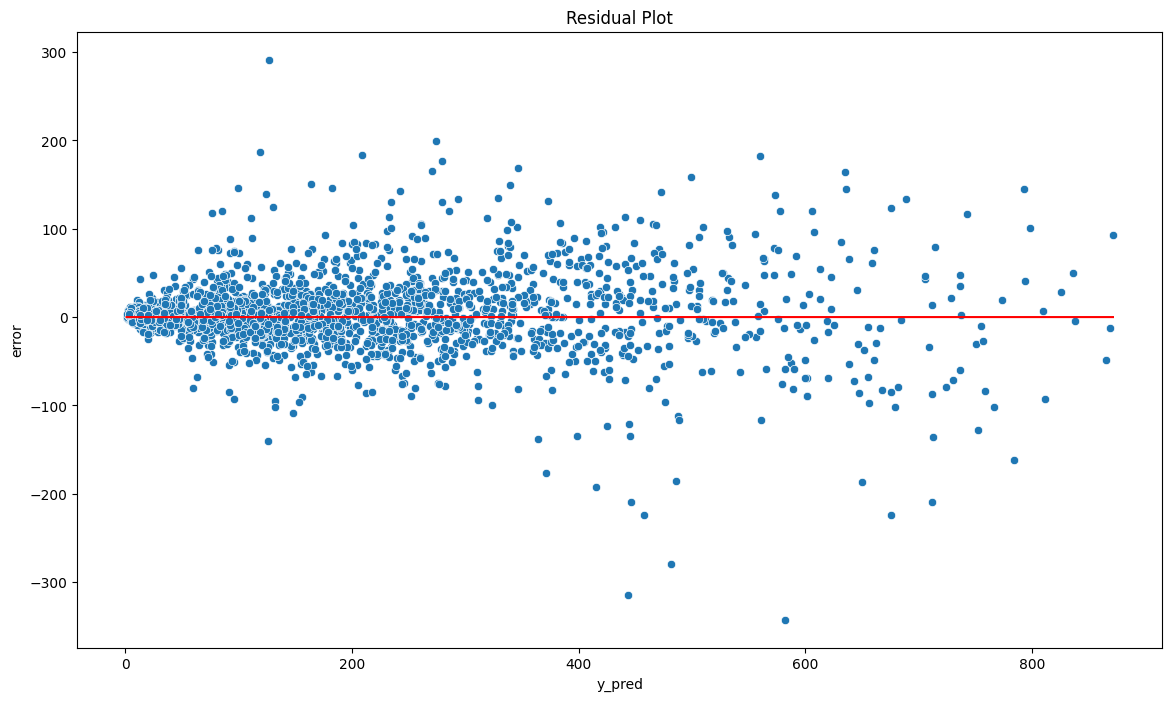

In [84]:
df_error = pd.DataFrame({
    'y_pred':y_pred,
    'error': (y_test - y_pred_xgb_tuning)
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_error, x="y_pred", y="error")
sns.lineplot(data=df_error, x="y_pred", y=0, color="r")
plt.title("Residual Plot")
plt.show()

The residual plot shows a random distribution of errors around the zero line, indicating that the model is generally unbiased. However, there is evidence of heteroscedasticity, as the spread of residuals increases with higher predicted values, suggesting that the model's prediction errors grow larger for higher values of `y_pred`. Additionally, some potential outliers are visible, which may be influencing model performance. These findings suggest that while the model is fairly robust, further optimization, such as addressing heteroscedasticity or examining outliers, could improve its accuracy.

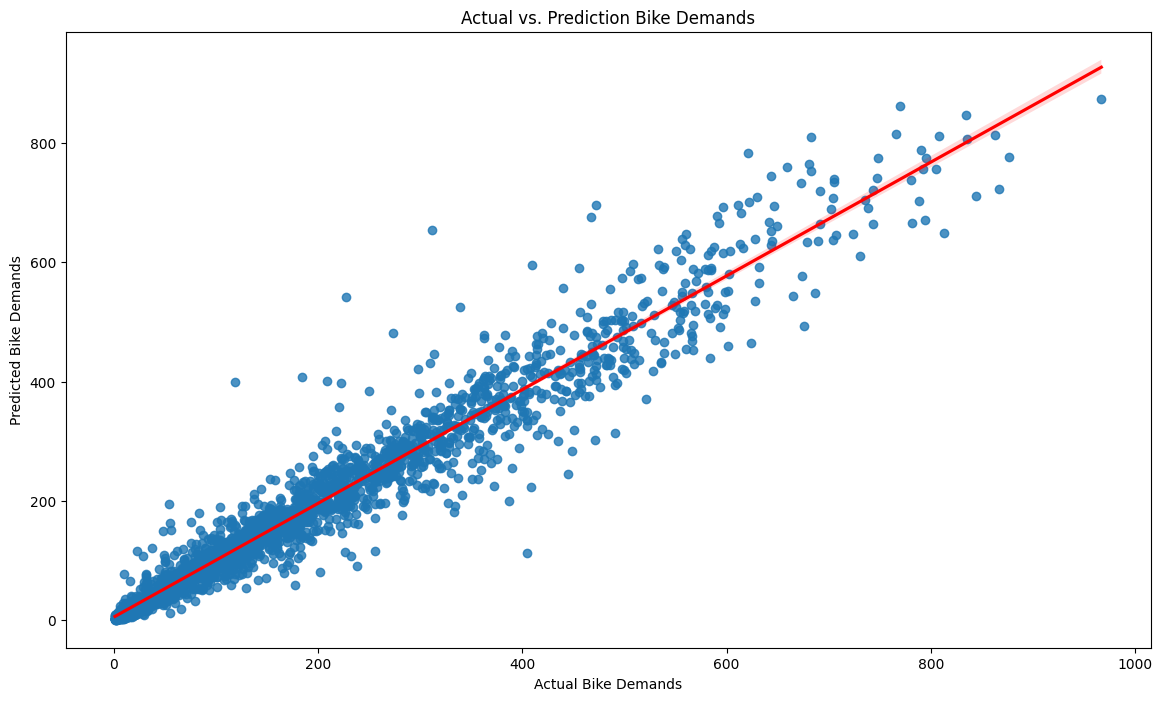

In [109]:
plt.figure(figsize=(14, 8))
plot = sns.regplot(x=y_test, y=y_pred_xgb_tuning, line_kws={"color": "red"}).set(title="Actual vs. Prediction Bike Demands", 
                                               xlabel="Actual Bike Demands", 
                                               ylabel="Predicted Bike Demands");

The data points form a fairly strong diagonal line, suggesting that the model generally predicts demands accurately. However, there is some visible scatter, particularly at higher demands values, indicating that the model may have more difficulty predicting higher demands with precision. A few outliers are observed, where the model's predictions deviate significantly from the actual values. Overall, the plot shows a positive linear relationship, but some refinement may be needed to improve the model’s accuracy, particularly for high-value predictions.

---

## **Features Importance**

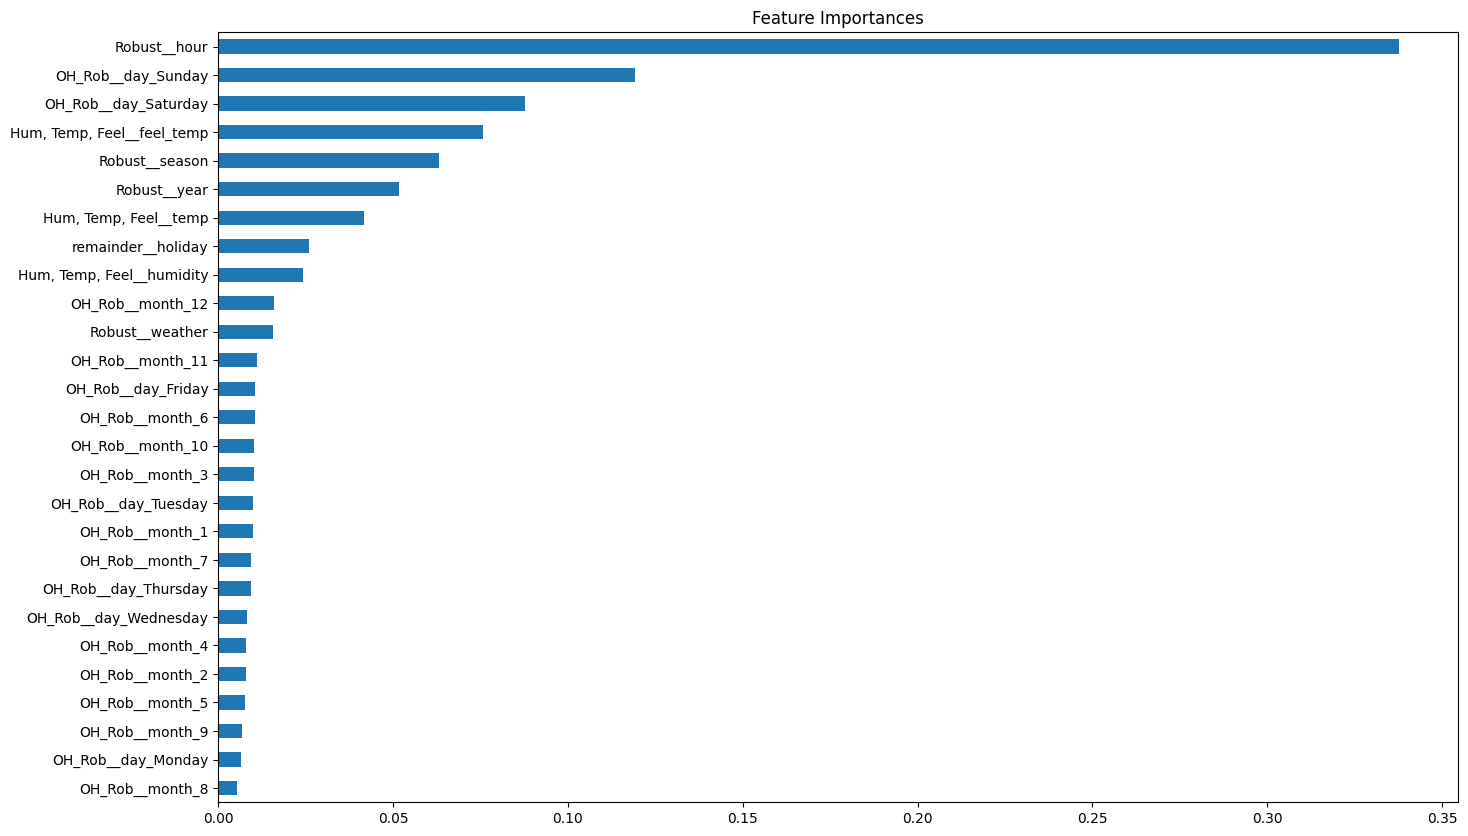

In [86]:
# Access the underlying model from TransformedTargetRegressor
underlying_model = xgb_tuning["modeling"].regressor_

feature_names = transformer.get_feature_names_out()
    
# Create a Series of feature importances
feature_imp = pd.Series(underlying_model.feature_importances_, index=feature_names).sort_values(ascending=False)
    
# Plot the feature importances
plt.figure(figsize=(16,10))
feature_imp.sort_values().plot(kind="barh", title="Feature Importances");

The most significant feature is the **hour of the day**, indicating that bike rentals are heavily influenced by time, with peak demand likely aligning with commuting hours in the morning and evening. **Weekend days** (Saturday and Sunday) also play a crucial role, suggesting that leisure activities significantly impact rental patterns during these days. Furthermore, the **feel temperature**, which combines factors like humidity and actual temperature, is another critical predictor, as favorable weather encourages more people to rent bikes.

Other notable factors include **season** and **year**, which capture broader seasonal trends and overall yearly changes in demand. Additionally, while features like **holidays** and **weather conditions** are relevant, they appear to have a smaller impact compared to time and temperature. Lower-ranked features, such as specific **months** or **weekdays**, contribute more subtly to the model's predictions. Overall, the analysis shows that time of day, weekend influence, and weather conditions are the dominant variables driving bike rental demand.

In [87]:
import shap

col_names=random_xgb.best_estimator_[0].get_feature_names_out()

best_model = random_xgb.best_estimator_["modeling"].regressor_

data = pd.DataFrame(random_xgb.best_estimator_[0].fit_transform(X_train), columns=col_names)

100%|===================| 9697/9720 [02:08<00:00]        

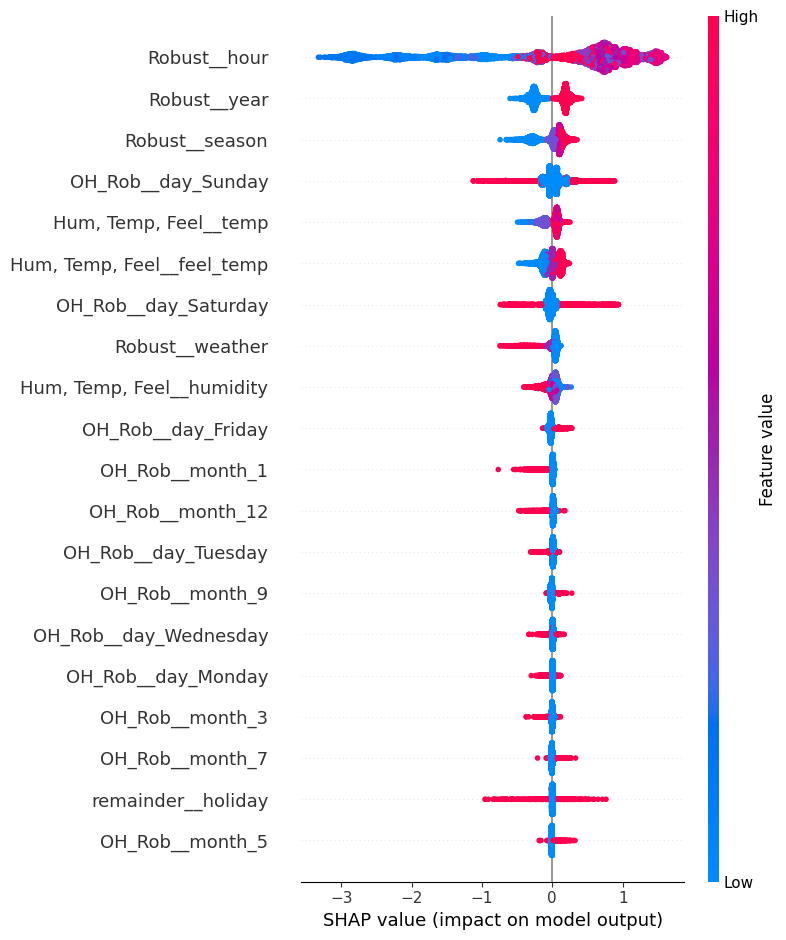

In [88]:
# define explainer
explainer = shap.TreeExplainer(
    best_model,
    data = data  
)

# count shap value for every rows in the train data
shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values, data, feature_names = feature_names)

 The **Robust hour** feature, again, stands out as the most significant, with a wide range of SHAP values, indicating that the time of day has a substantial impact on rental demand. High values of the hour variable (closer to rush hours) are associated with increased bike rentals (positive SHAP values), while low values correspond to reduced rentals. 

Other features like **year** and **season** also show notable impacts. The model predicts higher bike rentals during specific seasons or in later years, suggesting upward trends in usage over time. Additionally, **weekend days** (Sunday and Saturday) have a mixed effect, with higher SHAP values associated with high rental activity, as these days tend to promote more leisure usage. Weather-related features like **temperature** and **humidity** similarly show a strong correlation, where optimal weather conditions boost bike rentals, while extreme or unfavorable conditions (high humidity, low temperatures) reduce them.

## **Conclusion**

This project that aimed at predicting bike rental demand has identified **Extreme Gradient Boosting (XGB)** as the most effective model after comparing it with various alternatives, including Linear Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Adaptive Boost. Below are the key insights and conclusions:

### **Model Performance:**
  - **Root Mean Square Error (RMSE):** **39.95** – On average, the model's predictions deviate by approximately **40 rentals**. Given that bike rental counts range from **1 to 970**, this represents around **4%** error during peak demand, which could impact resource planning.
  - **Mean Absolute Error (MAE):** **24.27** – On average, predictions deviate by **24 rentals**. This error could be manageable during low-demand periods but could result in resource misallocation during peak hours.
  - **Mean Absolute Percentage Error (MAPE):** **24.2%** – This places the model in the "reasonable" forecast accuracy category, as per **Lewis (1982)**. According to Lewis's framework:
    - **<10%** – Highly accurate forecast.
    - **11% to 20%** – Good forecast.
    - **21% to 50%** – Reasonable forecast.
    - **>51%** – Inaccurate forecast.

### **Implications of Errors:**
  - **Operational Impact:** Underestimating demand could lead to insufficient bikes, while overestimating demand might result in excess bikes, leading to unnecessary costs.
  - **Economic Impact:** A **40-rental** underestimation could result in missed revenue opportunities of up to **$80** per hour (assuming an average rental price of $2). Over a busy day, this loss could accumulate significantly.

### **Feature Importance:**
  - The **hour** feature is the most important predictor, with later hours correlating with higher bike rental demand, reflecting typical usage patterns in bike-sharing systems.

### **Model Limitations:**
  - **Data Dependency:** The model's performance heavily relies on the quality and comprehensiveness of the input features. Missing or inaccurate data can significantly affect predictions.
  - **Temporal Dynamics:** The model may not fully capture rapid changes in user behavior due to external factors, such as unexpected weather events or major local events that influence bike demand.
  - **Feature Limitations:** Although the dataset includes various features, factors such as socio-economic variables, specific events, or promotions are not included, which may lead to less accurate predictions under certain conditions.

### **In Summary,,,**
  - While the model's performance is classified as "reasonable" based on MAPE, it provides valuable insights for stakeholders to make data-driven decisions. These insights can help optimize bike availability, enhance user experience, and improve overall operational efficiency.
  - Ongoing evaluation and model refinement are essential to further improve forecast accuracy and adapt to changing user behaviors and external factors in the urban mobility ecosystem.

## **Recommendations**

1. **Optimize Resource Allocation:** Since the `hour` feature shows a strong positive correlation with bike rentals and have the highest importance of all featues, ensure that additional bikes are available during late afternoon and early evening hours. Implement proactive redistribution strategies based on predicted demand.

2. **Enhance Station Operations:** Given that seasonal bookings are relatively balanced, maintain consistent bike availability throughout the year. Consider special promotions during summer (when rentals peak) to attract more casual users.

3. **Weather Considerations:** With higher rentals on clear days, develop targeted marketing campaigns or promotions to encourage bike rentals on such days. Consider partnerships with local businesses to offer discounts or incentives.

4. **Improve Weekend Promotional Efforts:** Since rentals are predominantly higher on weekdays, create strategies to attract more weekend users. This could include promotional events or family-oriented activities that encourage bike rentals.

5. **Incorporate Additional Features:** Analyze if additional features (e.g., special events, local traffic patterns, weekends or weekdays) could improve predictive performance.

6. **Monitor and Adapt:** Regularly evaluate model performance and adjust strategies based on real-time data. Implement A/B testing for various promotional strategies to determine which approaches yield the best results.

By focusing on these strategies, stakeholders can enhance bike-sharing operations, balancing bike availability, and improving overall service efficiency year-round.

## **Save Model**

Saving the chosen, best-tuned model using pickle.

In [89]:
import pickle

In [90]:
# model_result = random_xgb.best_estimator_

# model_result.fit(X, y)

# pickle.dump(model_result, open("model_xgb_regressor.sav", "wb"))

In [91]:
# load_model = pickle.load(open("model_xgb_regressor.sav", "rb"))
# load_model